<a href="https://colab.research.google.com/github/gmehra123/PROJECTS/blob/master/ML_2_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Modules and Data cleaning/Exploration

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [ ]:
melb=pd.read_csv('drive/MyDrive/Colab Notebooks/melb_data.csv')

In [ ]:
melb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [ ]:
melb.isnull().sum()


Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [ ]:
# Forward filling missing values for council area
melb['CouncilArea']=melb.CouncilArea.fillna(method='ffill')

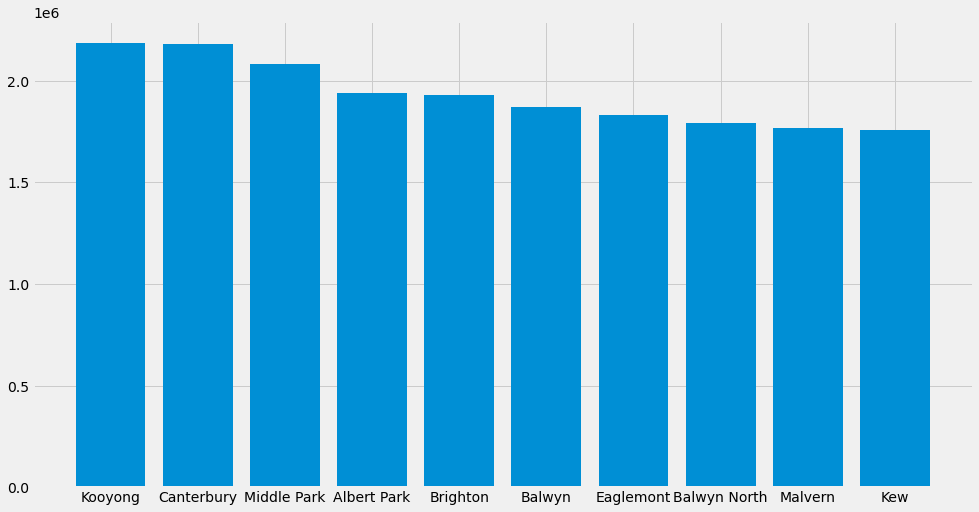

In [ ]:
# Checking relation ship between suburbs and price
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,8))
top_10_Suburb=melb.groupby('Suburb',as_index=False)['Price'].mean().sort_values(by='Price',ascending=False).head(10)
plt.bar(x=top_10_Suburb.Suburb,height=top_10_Suburb.Price)
plt.show()

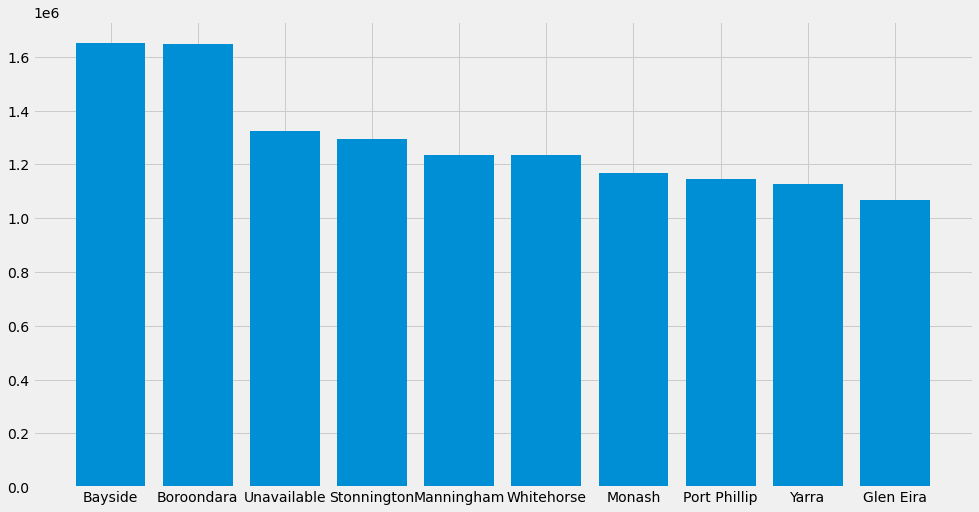

In [ ]:
# Checking relation ship between suburbs and price
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,8))
top_10_Suburb=melb.groupby('CouncilArea',as_index=False)['Price'].mean().sort_values(by='Price',ascending=False).head(10)
plt.bar(x=top_10_Suburb.CouncilArea,height=top_10_Suburb.Price)
plt.show()

* There is clearly some relation ship between suburb and price
* There is also some relationship between Council Area and price
* We will run our model first with suburb and then Council Area to see which gives a better fit on the data

In [ ]:
#getting only the list of features we need
melb_n=melb.select_dtypes(include=['int','float']).columns.to_list()
melb_n.append('Suburb')


In [ ]:
# We need to encode the suburb column into some numerical value
from sklearn.preprocessing import LabelEncoder
melb_fnl=melb.loc[:,melb_n].copy()
le=LabelEncoder()
melb_fnl['Suburb']=le.fit_transform(melb_fnl['Suburb'])
melb_fnl.sample(5)

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Suburb
11534,2,604000.0,14.5,3087.0,2.0,1.0,1.0,151.0,NaN,NaN,-37.71298,145.08115,2329.0,296
13010,3,620000.0,11.7,3033.0,3.0,2.0,1.0,292.0,113.0,2013.0,-37.74695,144.86625,5629.0,166
7247,3,620000.0,8.2,3012.0,3.0,1.0,2.0,255.0,148.0,2001.0,-37.80380,144.86790,5058.0,299
10359,3,806000.0,11.7,3033.0,3.0,2.0,4.0,546.0,NaN,NaN,-37.74761,144.85210,5629.0,166
5585,3,1510000.0,3.3,3141.0,3.0,5.0,0.0,241.0,NaN,NaN,-37.84070,144.99620,14887.0,259


In [ ]:
# Doing a train test split
X=melb_fnl.drop(columns='Price')
y=melb_fnl.Price
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=1)

In [ ]:
# Imputing missing values
from sklearn.impute import SimpleImputer
mean_impute=SimpleImputer(strategy='mean')
X_train_imputed=pd.DataFrame(mean_impute.fit_transform(X_train))
X_test_imputed=pd.DataFrame(mean_impute.transform(X_test))
X_train_imputed.columns=X_train.columns
X_test_imputed.columns=X_test.columns
X_train_imputed.sample(5)
X_test_imputed.sample(5)

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Suburb
1153,2.0,5.0,3182.0,2.0,1.0,1.0,3093.0,152.805817,1964.87892,-37.86506,144.97777,13240.0,266.0
974,3.0,12.2,3147.0,3.0,1.0,1.0,792.0,792.000000,1950.00000,-37.86400,145.09720,2894.0,14.0
1122,2.0,5.2,3056.0,2.0,1.0,1.0,147.0,152.805817,1964.87892,-37.77020,144.96920,11918.0,46.0
843,3.0,8.5,3044.0,3.0,1.0,3.0,446.0,152.805817,1964.87892,-37.73366,144.94321,7485.0,229.0
114,3.0,3.4,3031.0,3.0,2.0,2.0,0.0,120.000000,1999.00000,-37.79482,144.92192,5263.0,169.0


In [ ]:
# creating the model function
def apply_model(max_depth,X_train,X_test,y_train,y_test):
  dt=DecisionTreeRegressor(max_depth=max_depth,random_state=123)
  dt.fit(X_train,y_train)
  ypreds=dt.predict(X_test)
  error=mean_absolute_error(y_test,ypreds)
  return((max_depth,error))

In [ ]:
max_depth=[2,3,4,5,6,7,8,9,10,12,13,14,15]
for depth in max_depth:
  max_depth,error=apply_model(depth,X_train_imputed,X_test_imputed,y_train,y_test)
  print('Max depth is-->',max_depth,'  Error is-->',error)

Max depth is--> 2   Error is--> 365459.4291229969
Max depth is--> 3   Error is--> 311959.25573943666
Max depth is--> 4   Error is--> 268557.10275069665
Max depth is--> 5   Error is--> 249565.3388521688
Max depth is--> 6   Error is--> 231903.09820691176
Max depth is--> 7   Error is--> 225846.80907128617
Max depth is--> 8   Error is--> 215204.98741495115
Max depth is--> 9   Error is--> 212228.786018569
Max depth is--> 10   Error is--> 206756.43271771463
Max depth is--> 12   Error is--> 205250.1306617147
Max depth is--> 13   Error is--> 204754.2872324127
Max depth is--> 14   Error is--> 207515.44590216858
Max depth is--> 15   Error is--> 214707.65011601325
